In [190]:
## Referrence: 
## https://blog.floydhub.com/colorizing-b&w-photos-with-neural-networks/

from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2grey, xyz2lab
from skimage.io import imsave, imshow
import numpy as np
import os
import random
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

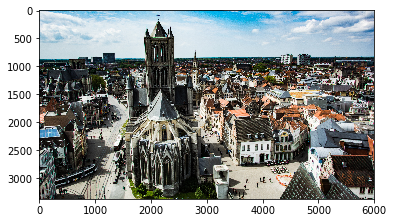

In [191]:
# train images
image = load_img('1.jpeg')
plt.imshow(image)
plt.show()
image = cv2.resize(img_to_array(image), (256, 256)) 
image = np.array(image, dtype=float)

In [171]:
X = rgb2lab(1.0/255*image)[:,:,0]
Y = rgb2lab(1.0/255*image)[:,:,1:]
Y /= 128
X = X.reshape(1, 256, 256, 1)
Y = Y.reshape(1, 256, 256, 2)

In [172]:
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [173]:
# Finish model
model.compile(optimizer='rmsprop', loss='mse')

In [182]:
model.fit(x=X, 
	y=Y,
	batch_size=1,
	epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 182ms/step - loss: 0.0012
Epoch 2/100
1/1 [==============================] - 0s 140ms/step - loss: 0.0012
Epoch 3/100
1/1 [==============================] - 0s 178ms/step - loss: 0.0013
Epoch 4/100
1/1 [==============================] - 0s 147ms/step - loss: 0.0013
Epoch 5/100
1/1 [==============================] - 0s 169ms/step - loss: 0.0013
Epoch 6/100
1/1 [==============================] - 0s 147ms/step - loss: 0.0013
Epoch 7/100
1/1 [==============================] - 0s 139ms/step - loss: 0.0012
Epoch 8/100
1/1 [==============================] - 0s 130ms/step - loss: 0.0012
Epoch 9/100
1/1 [==============================] - 0s 150ms/step - loss: 0.0012
Epoch 10/100
1/1 [==============================] - 0s 142ms/step - loss: 0.0012
Epoch 11/100
1/1 [==============================] - 0s 152ms/step - loss: 0.0012
Epoch 12/100
1/1 [==============================] - 0s 144ms/step - loss: 0.0012
Epoch 13/100
1/1 [===================

1/1 [==============================] - 0s 51ms/step
0.00122367334552
1/1 [==============================] - 0s 37ms/step
0.00122367334552


/Users/jane/anaconda3/lib/python3.6/site-packages/skimage/color/colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 25 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
/Users/jane/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/jane/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


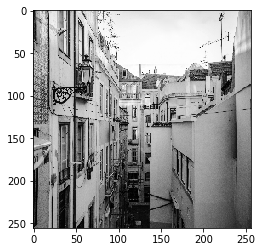

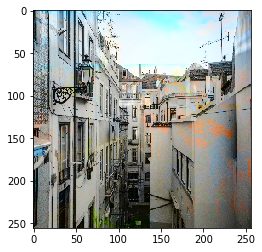

In [233]:
print(model.evaluate(X, Y, batch_size=1))
print(model.evaluate(X, Y, batch_size=1))

# test image
image = img_to_array(load_img('2.jpeg'))
image = cv2.resize(image, (256, 256)) 
image = np.array(image, dtype=float)

X = rgb2lab(1.0/255*image)[:,:,0]
# X = X.reshape(1, 400, 400, 1)
X = X.reshape(1, 256, 256, 1)

output = model.predict(X)
output *= 128
# Output colorizations
cur = np.zeros((256, 256, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output[0]
imsave("img_result.png", lab2rgb(cur))
imsave("img_gray_version.png", rgb2gray(lab2rgb(cur)))
plt.imshow(rgb2gray(lab2rgb(cur)), 'gray')
plt.show()
plt.imshow(lab2rgb(cur))
plt.show()

